In [ ]:
import polars as pl
import os

cluster_file = "./laban-hierarchial-6n.csv"
output_file = os.path.basename(cluster_file).split(".")[0] + ".png"
feat_file = "features_cleaned.csv"
cluster_df = pl.read_csv(cluster_file)
feat_df = pl.read_csv(feat_file)

df = feat_df.join(cluster_df, on="name", how="inner")
print(df)


In [10]:
# LABAN

clusters = df.get_column("cluster").unique().to_list()
features = df.drop(
    pl.col("name"),
    pl.col("cluster"),
).columns
feats_raw = set()
for feat in features:
    feat_name = feat.split("_")[0]
    feats_raw.add(feat_name)

In [ ]:
# STAT

clusters = df.get_column("cluster").unique().to_list()
features = df.drop(
    pl.col("name"),
    pl.col("cluster"),
).columns
feats_raw = set()
for feat in features:
    feat_name = [*feat.split("_")[0:-2], feat.split("_")[-1]]
    feat_name = "_".join(feat_name)
    feats_raw.add(feat_name)
print(feats_raw)


In [ ]:
# STAT

import matplotlib.pyplot as plt
%matplotlib widget

fig_num = len(feats_raw)
fig, axs = plt.subplots(fig_num, 4, layout="constrained", figsize=(20, 40))

for i, feat in zip(range(len(feats_raw)), feats_raw):
    feat_name = "_".join(feat.split("_")[0:-1])
    feat_att = feat.split("_")[-1]
    this_df = df.select(
        (pl.selectors.starts_with(feat_name) & pl.selectors.ends_with(feat_att)),
        pl.col("cluster"),
    )
    mins_all = []
    maxs_all = []
    means_all = []
    stds_all = []
    for cluster in clusters:
        this_cluster_df = this_df.filter(
            pl.col("cluster") == cluster,
        )
        # LABAN
        mins_all.append(this_cluster_df[f'{feat_name}_min_{feat_att}'])
        maxs_all.append(this_cluster_df[f'{feat_name}_max_{feat_att}'])
        means_all.append(this_cluster_df[f'{feat_name}_avg_{feat_att}'])
        stds_all.append(this_cluster_df[f'{feat_name}_sd_{feat_att}'])

    axs[i, 0].boxplot(mins_all)
    axs[i, 0].set_title(f'{feat_name}_min_{feat_att}')
    axs[i, 1].boxplot(maxs_all)
    axs[i, 1].set_title(f'{feat_name}_max_{feat_att}')
    axs[i, 2].boxplot(means_all)
    axs[i, 2].set_title(f'{feat_name}_mean_{feat_att}')
    axs[i, 3].boxplot(stds_all)
    axs[i, 3].set_title(f'{feat_name}_std_{feat_att}')
plt.savefig(output_file)
   

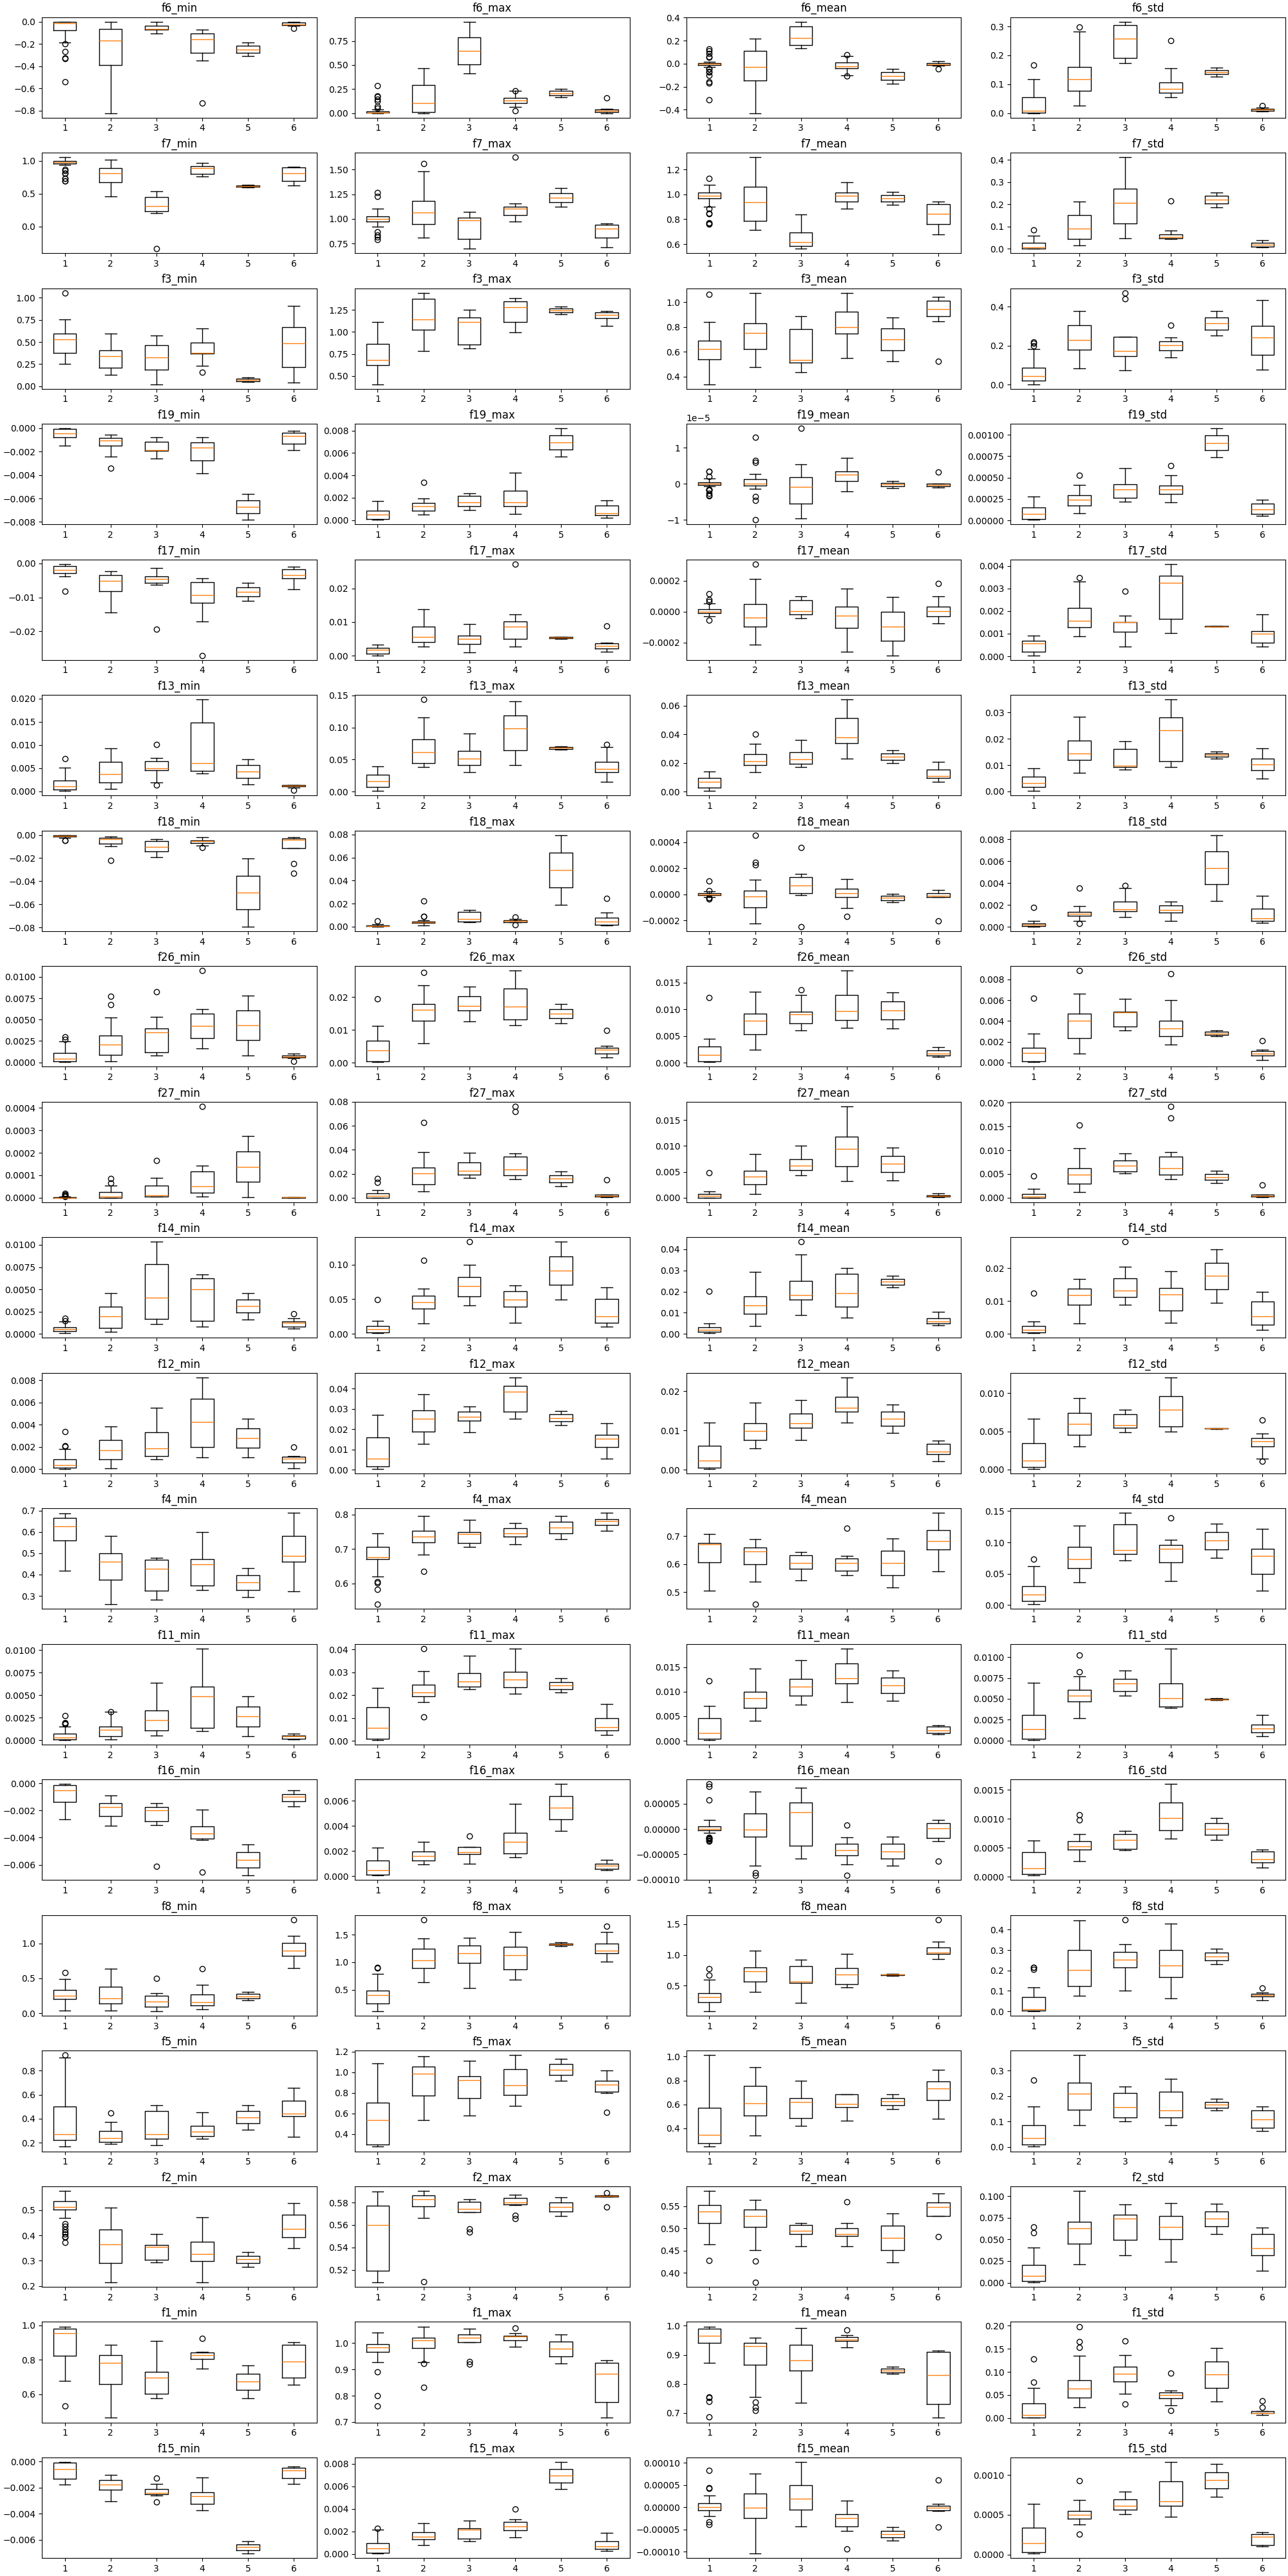

In [11]:
import matplotlib.pyplot as plt
%matplotlib widget

fig_num = len(feats_raw)
fig, axs = plt.subplots(fig_num, 4, layout="constrained", figsize=(20, 40))

for i, feat in zip(range(len(feats_raw)), feats_raw):
    this_df = df.select(
        pl.selectors.starts_with(f'{feat}_'),
        pl.col("cluster"),
    )
    mins_all = []
    maxs_all = []
    means_all = []
    stds_all = []
    for cluster in clusters:
        this_cluster_df = this_df.filter(
            pl.col("cluster") == cluster,
        )
        # LABAN
        mins_all.append(this_cluster_df[f'{feat}_min'])
        maxs_all.append(this_cluster_df[f'{feat}_max'])
        means_all.append(this_cluster_df[f'{feat}_mean'])
        stds_all.append(this_cluster_df[f'{feat}_std'])

    axs[i, 0].boxplot(mins_all)
    axs[i, 0].set_title(f'{feat}_min')
    axs[i, 1].boxplot(maxs_all)
    axs[i, 1].set_title(f'{feat}_max')
    axs[i, 2].boxplot(means_all)
    axs[i, 2].set_title(f'{feat}_mean')
    axs[i, 3].boxplot(stds_all)
    axs[i, 3].set_title(f'{feat}_std')
plt.savefig(output_file)
   

In [ ]:
import matplotlib.pyplot as plt
%matplotlib widget

fig_num = len(feats_raw)
fig, axs = plt.subplots(fig_num, 1, layout="constrained", figsize=(8, 40))

for i, feat in zip(range(len(feats_raw)), feats_raw):
    feat_name = "_".join(feat.split("_")[0:-1])
    feat_att = feat.split("_")[-1]
    this_df = df.select(
        (pl.selectors.starts_with(feat_name) & pl.selectors.ends_with(feat_att)),
        pl.col("cluster"),
    )
    data_all = []
    data_all.append(this_df[f'{feat_name}_min_{feat_att}'])
    data_all.append(this_df[f'{feat_name}_max_{feat_att}'])
    data_all.append(this_df[f'{feat_name}_avg_{feat_att}'])
    data_all.append(this_df[f'{feat_name}_sd_{feat_att}'])

    axs[i].boxplot(data_all)
    axs[i].set_title(f'{feat}')
plt.savefig(output_file)
   

In [ ]:
import matplotlib.pyplot as plt
%matplotlib widget

fig_num = len(feats_raw)
fig, axs = plt.subplots(fig_num, 1, layout="constrained", figsize=(8, 40))

for i, feat in zip(range(len(feats_raw)), feats_raw):
    this_df = df.select(
        pl.selectors.starts_with(f'{feat}_'),
        pl.col("cluster"),
    )
    data_all = []
    data_all.append(this_df[f'{feat}_min'])
    data_all.append(this_df[f'{feat}_max'])
    data_all.append(this_df[f'{feat}_mean'])
    data_all.append(this_df[f'{feat}_std'])

    axs[i].boxplot(data_all)
    axs[i].set_title(f'{feat}')
plt.savefig(output_file)
   